<a href="https://colab.research.google.com/github/riteshk2311/Covid19/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>LIBRARIES</h1>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
import io
from google.colab import files
uploaded= files.upload()
df= pd.read_csv(io.BytesIO(uploaded['raw_data.csv']))

Saving raw_data.csv to raw_data (5).csv


In [11]:
df

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Notes,Contracted from which Patient (Suspected),Nationality,Status Change Date,Source_1,Source_2,Source_3,Backup Notes
0,1.0,KL-TS-P1,30/01/2020,NaN,20.0,F,Thrissur,Thrissur,Kerala,Recovered,Travelled from Wuhan,NaN,India,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,Travelled from Wuhan,NaN,India,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,Travelled from Wuhan,NaN,India,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan
3,4.0,DL-P1,02/03/2020,NaN,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,"Travelled from Austria, Italy",NaN,India,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria
4,5.0,TS-P1,02/03/2020,NaN,24.0,M,Hyderabad,Hyderabad,Telangana,Recovered,NaN,NaN,India,02/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/03/2020,NaN,NaN,NaN,NaN
1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/03/2020,NaN,NaN,NaN,NaN
1055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/03/2020,NaN,NaN,NaN,NaN
1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29/03/2020,NaN,NaN,NaN,NaN


In [12]:
df.drop(['Estimated Onset Date', 'Notes', 'Contracted from which Patient (Suspected)', 'Source_1', 'Source_2', 'Source_3', 'Backup Notes' ], axis = 1, inplace = True)
df.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Nationality,Status Change Date
0,1.0,KL-TS-P1,30/01/2020,20.0,F,Thrissur,Thrissur,Kerala,Recovered,India,14/02/2020
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,India,14/02/2020
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,India,14/02/2020
3,4.0,DL-P1,02/03/2020,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,India,15/03/2020
4,5.0,TS-P1,02/03/2020,24.0,M,Hyderabad,Hyderabad,Telangana,Recovered,India,02/03/2020


In [13]:
df.drop(['Patient Number','Status Change Date'],axis = 1,inplace = True)

In [14]:
df.head()

,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Nationality
0,KL-TS-P1,30/01/2020,20.0,F,Thrissur,Thrissur,Kerala,Recovered,India
1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,India
2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,India
3,DL-P1,02/03/2020,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,India
4,TS-P1,02/03/2020,24.0,M,Hyderabad,Hyderabad,Telangana,Recovered,India


In [15]:
from scipy import stats
import datetime as dt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(font_scale=1.4)

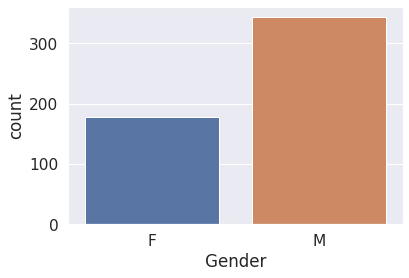

M    343
F    178
Name: Gender, dtype: int64

In [16]:
sns.countplot("Gender", data = df)
plt.show()
df.dropna()
df['Gender'].value_counts()

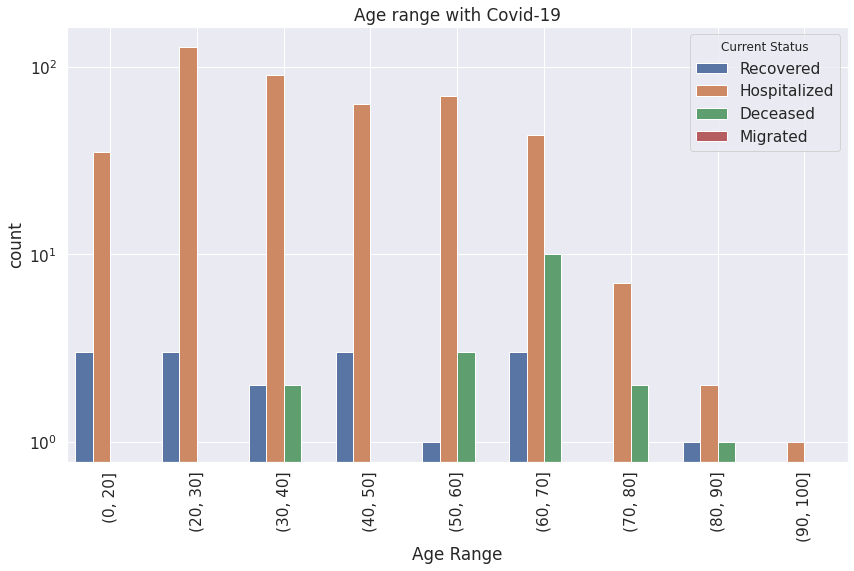

In [17]:
age = df['Age Bracket']
status = df['Current Status']
age_bins = [0,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(14,8))
sns.countplot(x=pd.cut(age, age_bins), hue=status)
plt.xticks(rotation=90)
plt.xlabel("Age Range")
plt.yscale('log')
plt.title("Age range with Covid-19")
plt.grid(True)
plt.show()

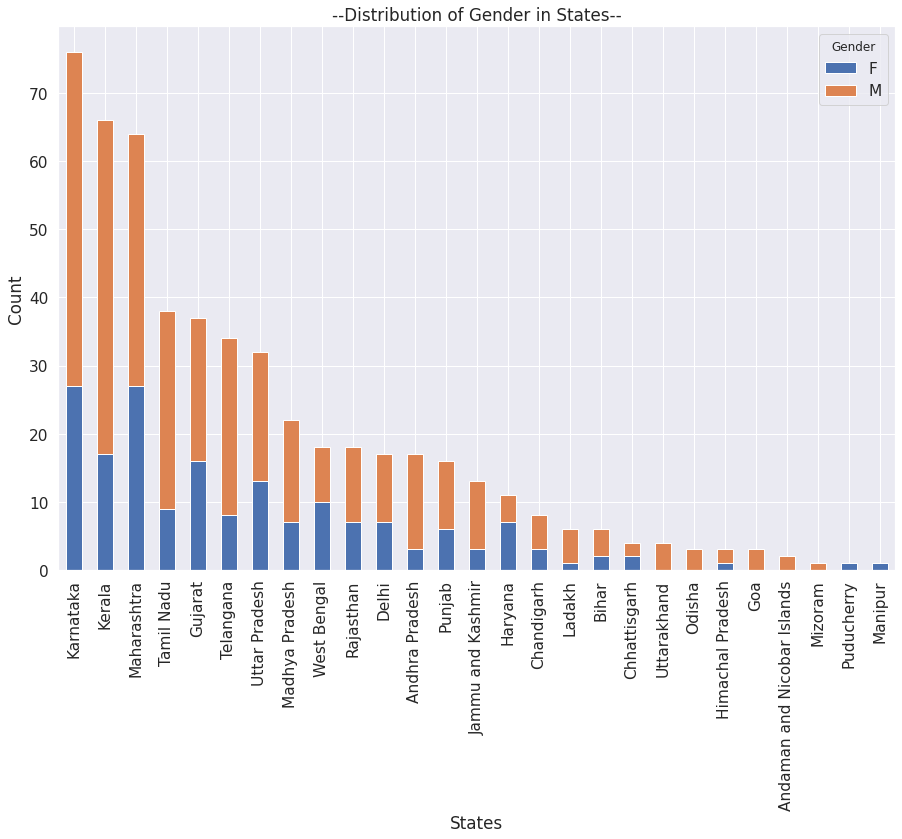

In [18]:
gender  = df.groupby(['Detected State', 'Gender']).size().reset_index().pivot(columns='Gender', index='Detected State', values=0)

gender = gender.fillna(0)
gender['total'] = gender.F + gender.M

gender =  gender.sort_values(by='total', ascending=False)
gender.drop('total', axis=1, inplace=True)


gender.plot(kind='bar', stacked=True, figsize=(15,10))
plt.xlabel("States")
plt.ylabel("Count")
plt.title("--Distribution of Gender in States--")
plt.grid(True)
plt.show()

In [19]:
district = df.groupby('Detected District').count()
fig = px.pie(district, values='Current Status', names=district.index,color_discrete_sequence=px.colors.sequential.Plasma_r,title='Covid19 cases based on District')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

In [20]:
nationality = df.groupby('Nationality').count()
fig = px.pie(nationality, values='Current Status', names=nationality.index,title='Covid19 cases based on Nationality in India')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()